Filename        object
Class Label      int64
f0             float64
f1             float64
f2             float64
                ...   
f195           float64
f196           float64
f197           float64
f198           float64
f199           float64
Length: 202, dtype: object
Class Distribution:
 Class Label
1    1634
0    1055
2     564
Name: count, dtype: int64


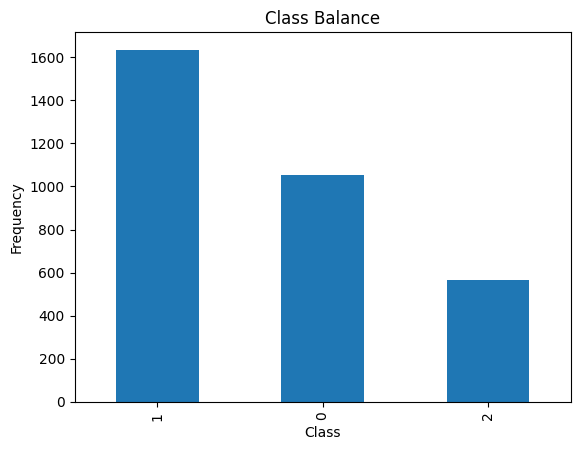

Correlation Matrix:
              Class Label        f0        f1        f2        f3        f4  \
Class Label     1.000000  0.463661 -0.722913 -0.780848 -0.746388 -0.595582   
f0              0.463661  1.000000 -0.135262 -0.310323 -0.380149 -0.098776   
f1             -0.722913 -0.135262  1.000000  0.881897  0.744823  0.930110   
f2             -0.780848 -0.310323  0.881897  1.000000  0.961333  0.841121   
f3             -0.746388 -0.380149  0.744823  0.961333  1.000000  0.703499   
...                  ...       ...       ...       ...       ...       ...   
f195           -0.786789 -0.241574  0.953695  0.948737  0.845233  0.884773   
f196           -0.801463 -0.276247  0.935592  0.984923  0.916102  0.857046   
f197           -0.296790 -0.017810  0.570506  0.511914  0.413386  0.672960   
f198           -0.742889 -0.165086  0.971878  0.862041  0.737351  0.850786   
f199            0.116454  0.885136  0.331528  0.119751 -0.008737  0.357157   

                   f5        f6  f7       

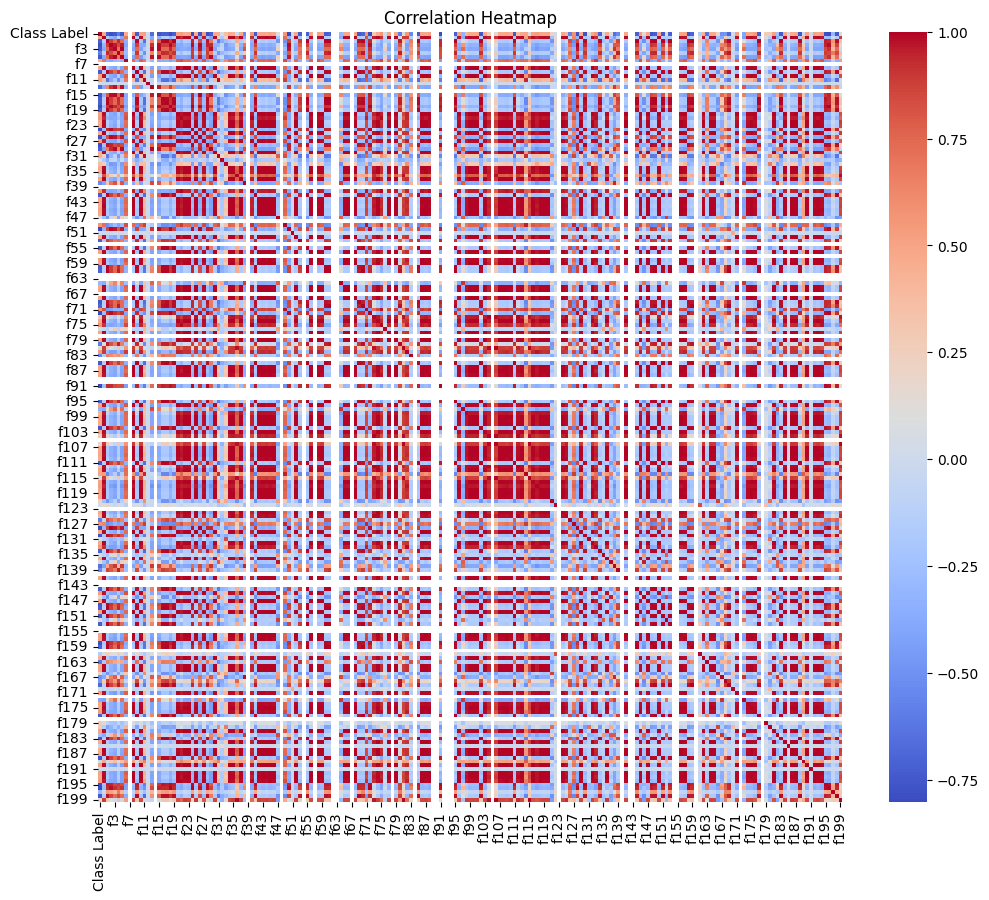

Matrix Rank: 174
Data Range:
 Class Label       2.000000
f0              781.789490
f1              459.207794
f2              536.879639
f3              760.753845
                  ...     
f194           5749.376465
f195            750.316284
f196            571.680176
f197             31.048813
f198            505.643402
Length: 200, dtype: float64
   Class Label        f0   f1   f2   f3   f4   f5        f6   f7        f8  \
0            2  0.064669  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.040959   
1            2  0.160217  0.0  0.0  0.0  0.0  0.0  0.224739  0.0  0.171410   
2            2  0.064161  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.042968   
3            2  0.081506  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.058093   
4            2  0.082483  0.0  0.0  0.0  0.0  0.0  0.171430  0.0  0.106704   

   ...      f189      f190  f191      f192      f193      f194  f195  f196  \
0  ...  0.018010  0.041971   0.0  0.040111  0.042329  0.035791   0.0   0.0   
1  ...  0.151084  0.

In [4]:
#A1
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import time

def read_excel_data(path):
  return pd.read_csv(path)

# finding the data type of the attributes
def print_data_types(df):
  print(df.dtypes)
# handling missing values
def missing_vals(df):
  return df.fillna('pad')

def class_balance(df):
  # Assuming the class labels are in the 'Class' column
  class_counts = df['Class Label'].value_counts()

  # Display class distribution
  print("Class Distribution:\n", class_counts)

  # Plot class balance
  class_counts.plot(kind='bar')
  plt.title('Class Balance')
  plt.xlabel('Class')
  plt.ylabel('Frequency')
  plt.show()

# function to check the correlation between attributes
def attribute_correlation(df):
  # Compute correlation matrix
  correlation_matrix = df.corr()

  # Display the correlation matrix
  print("Correlation Matrix:\n", correlation_matrix)

  # Plot heatmap of the correlation matrix
  plt.figure(figsize=(12, 10))
  sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
  plt.title('Correlation Heatmap')
  plt.show()

# matrix rank derivation
def calc_matrix_rank(df):
  # Compute rank of the data matrix
  matrix_rank = np.linalg.matrix_rank(df.iloc[:, :-1])  # Excluding the class label column
  print("Matrix Rank:", matrix_rank)

#function to normalize data
def normalize_data(df):
  # Calculate the range of each attribute
  data_range = df.iloc[:, :-1].max() - df.iloc[:, :-1].min()

  # Display data range
  print("Data Range:\n", data_range)

  # Normalize the dataset (Min-Max Normalization as an example)
  scaler = MinMaxScaler()
  normalized_data = pd.DataFrame(scaler.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])

  # Add the class label back
  normalized_data['Class Label'] = df['Class Label']

  # Display normalized data
  print(normalized_data.head())
  return normalized_data


#main
path = "/content/Custom_CNN_Features.csv"
#read the data from the csv file
df1 = read_excel_data(path)
print_data_types(df1)
df1 = missing_vals(df1)
class_balance(df1)
#remove the string values-file name
df_vals = df1
df1.drop(['Filename'], axis = 1, inplace = True)
attribute_correlation(df1)
calc_matrix_rank(df1)
#normalize data
df1 = normalize_data(df1)

In [5]:

# Split the dataset
X = df1.iloc[:, :-1]  # Features
y = df1['Class Label']      # Target (class labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize classifiers
classifiers = {
    "kNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naïve Bayes": GaussianNB(),
}

# Train, predict, and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    start_train = time.time()
    clf.fit(X_train, y_train)  # Train the model
    end_train = time.time()

    start_predict = time.time()
    y_pred = clf.predict(X_test)  # Predictions
    end_predict = time.time()

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate AUROC (use probabilities for binary or one-vs-rest for multiclass)
    if hasattr(clf, "predict_proba"):
        y_proba = clf.predict_proba(X_test)
        auroc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')
    else:
        auroc = None  # SVM doesn't have predict_proba without kernel tricks

    # Save results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUROC": auroc,
        "Train Time": end_train - start_train,
        "Predict Time": end_predict - start_predict,
    }

# Display results
results_df = pd.DataFrame(results).T
print(results_df)


               Accuracy  Precision    Recall  F1-Score     AUROC  Train Time  \
kNN            1.000000   1.000000  1.000000  1.000000  1.000000    0.017337   
Decision Tree  1.000000   1.000000  1.000000  1.000000  1.000000    0.103646   
SVM            1.000000   1.000000  1.000000  1.000000  1.000000    0.704055   
Random Forest  0.984029   0.984434  0.984029  0.984006  0.999594    1.996935   
Naïve Bayes    1.000000   1.000000  1.000000  1.000000  1.000000    0.047645   

               Predict Time  
kNN                0.265715  
Decision Tree      0.005293  
SVM                0.032880  
Random Forest      0.036134  
Naïve Bayes        0.021564  


In [6]:
# Train and test metrics for analysis
fit_analysis = {}

for name, clf in classifiers.items():
    train_pred = clf.predict(X_train)

    train_accuracy = accuracy_score(y_train, train_pred)
    train_f1 = f1_score(y_train, train_pred, average='weighted')

    test_accuracy = results[name]["Accuracy"]
    test_f1 = results[name]["F1-Score"]

    # Compare train and test scores
    fit_status = "Regular Fit"
    if train_accuracy > test_accuracy + 0.1:  # Overfitting
        fit_status = "Overfit"
    elif test_accuracy > train_accuracy + 0.1:  # Underfitting
        fit_status = "Underfit"

    fit_analysis[name] = {
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Train F1": train_f1,
        "Test F1": test_f1,
        "Fit Status": fit_status,
    }

# Display fit analysis
fit_analysis_df = pd.DataFrame(fit_analysis).T
print(fit_analysis_df)


              Train Accuracy Test Accuracy  Train F1   Test F1   Fit Status
kNN                  0.99918           1.0  0.999179       1.0  Regular Fit
Decision Tree            1.0           1.0       1.0       1.0  Regular Fit
SVM                      1.0           1.0       1.0       1.0  Regular Fit
Random Forest            1.0      0.984029       1.0  0.984006  Regular Fit
Naïve Bayes              1.0           1.0       1.0       1.0  Regular Fit


In [7]:
timing_info = results_df[['Train Time', 'Predict Time']]
print("Model Training and Prediction Times:\n", timing_info)


Model Training and Prediction Times:
                Train Time  Predict Time
kNN              0.017337      0.265715
Decision Tree    0.103646      0.005293
SVM              0.704055      0.032880
Random Forest    1.996935      0.036134
Naïve Bayes      0.047645      0.021564
